# Programming Assignment 4 - Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression problem.   

As an example, we will use the widely-used breast cancer data set. This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

Each sample is a collection of features that were manually recorded by a physician upon inspecting a sample of cells from fine needle aspiration. The goal is to detect if the cells are benign or malignant.

## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [1]:
from sklearn.datasets import load_breast_cancer # taking included data set from Sklearn http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn import preprocessing # preprocessing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
# Loading the dataset
cancer = load_breast_cancer()
y = cancer.target
X = cancer.data

In [3]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [4]:
# train_test_split to split the data, specifying the random_state so everyone gets the same split
# for grading purposes
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

#### Scale the data since we will be using gradient ascent

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# TODO - Print the shape of x_train and y_train 
 # When you print the shape of x_train, it should print (426, 30)
 # When you print the shape of y_train, it should print (426,)
print(X_train.shape)
print(y_train.shape)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [7]:
# Appending a column of ones to x_train 

# Step 1: Create a column vector of ones (i.e. a vector of shape N',1)
ones = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))


# Step 2: Append a column of ones in the beginning of x_train
X_train = np.hstack((ones, X_train))

# Now do the same for the test data
# Step 1: Create a column vector of ones (i.e. a vector of shape N",1)
ones = np.ones(X_test.shape[0]).reshape((X_test.shape[0], 1))
# Stemp 2: Append a column of ones in the beginning of x_test
X_test = np.hstack((ones, X_test))


# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The training data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The training data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


### Understanding the dataset

In [8]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# You can add your own code here to better understand the dataset


# Step 2: Fitting the model
## Implementing Logistic Regression Using Gradient Ascent


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{m}]$.

It should produce as output a column vector $\left[\frac{1}{1+exp(-z_1)},\frac{1}{1+exp(-z_2)},...,\frac{1}{1+exp(-z_{m})}\right]^T$

In [10]:
# TODO - Write the sigmoid function (z can be a scalar or a vector)



def sigmoid(z):
    ## TODO
    out = np.zeros(len(z), dtype=np.float128)
    
    for i in range(len(out)):   
        
        val = (1 / (1 + np.exp(-z[i])))
        
        #set certain val to round to 0
        if val < .0000001:
            out[i] = 0
        else:
            out[i] = val
    
    return out
    ## 

In [11]:
# VERIFY - Sigmoid of 0 should be equal to 0.5
print(sigmoid([0]))

[0.5]


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be random values between 0 and 0.1, e.g., ${\bf w}^T = [0.03,0.07,\ldots ,0.04]$.
Note that we could have chosen another way to initialize the coefficients.

In [12]:
# Initialize parameters w
# So that everyone will get the same results, we specify the seed to the random number generator
rng = np.random.default_rng(seed=42)
w = rng.random((X_train.shape[1], 1))/10
print(w.shape)

(31, 1)


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [13]:
# predict the probability that a patient has cancer 
# TODO - Write the hypothesis function 
def hypothesis(X , w):
    #TODO
    out = np.zeros(X.shape[0]).reshape((X.shape[0], 1))
    
    for i in range(len(X)):
        out[i] = np.dot(X[i], w)

    out = sigmoid(out)
        
    return out
    ##


Before moving on, do a quick check that your function can accept a matrix as an argument. 

In [14]:
# Compute y_hat using our training examples and w (with the previous random setting of w).  
# This is just a preliminary test of the hypothesis function

yhat = hypothesis(X_train, w)

# print the sizes of yhat and y as a first check that the function performed correctly
print(yhat.shape) # this should return (426, 1)
print(y_train.shape) # this should return (426,)


(426,)
(426,)


### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [15]:
# TODO - Write the log likelihood function 
# Depending on the precision being used, you may need to ensure that you are not trying to compute log(0)
def log_likelihood(X , y , w ):
    ##TODO
    
    yhat = hypothesis(X, w)
    
    log_likelihood = 0
    for i in range(X.shape[0]):
        
        if yhat[i] == 0 or (1 - yhat[i]) == 0:
            continue
        val = y[i] * np.log(yhat[i]) + (1 - y[i]) * np.log(1 - yhat[i])
        log_likelihood += val
        
    ##
    return log_likelihood # you should return a real number, not a list containing a real number



Before moving on, do a quick check of your log_likelihood function

In [16]:
# VERIFY - The value should be equal to -496.06217331717187.
print(log_likelihood(X_train,y_train,w))

-496.06217331717182006


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [17]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    log_likelihood_values = []  
    # Initialize w to be a random vector of values between 0 and 0.1 of shape x_train.shape[1],1
    rng = np.random.default_rng(seed=42)
    w = rng.random((X_train.shape[1],1))/10
    # Initialize N to the number of training examples
    N = X.shape[0] 
    ## TODO 
    
    temp = np.zeros(len(w))
    
    for i in range(num_iters):
        
        for j in range(len(w)):
            temp[j] = w[j] + ( (learning_rate / N) * log_likelihood(X, y, w) )

        w = temp
    ##
        if (i % 100) == 0:
            log_likelihood_values.append(log_likelihood(X,y,w))
        
    return w, log_likelihood_values

### After completing the code above, run the following

In [26]:
learning_rate = 0.5
num_iters = 5000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
print(w)
# print(log_likelihood_values)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-41.89360837 -41.74152823 -41.71503439 -41.70528879 -41.66326631
 -41.57538677 -41.61478778 -41.69371039 -41.71299725 -41.70804761
 -41.62260251 -41.65813235 -41.57998382 -41.60393405 -41.62867974
 -41.66310827 -41.66636063 -41.70594535 -41.662712   -41.66862527
 -41.53071052 -41.63397093 -41.53022281 -41.45907325 -41.46953241
 -41.51370684 -41.52666885 -41.62086291 -41.69988447 -41.62833476
 -41.50791561]


# Plotting Likelihood v/s Number of Iterations.

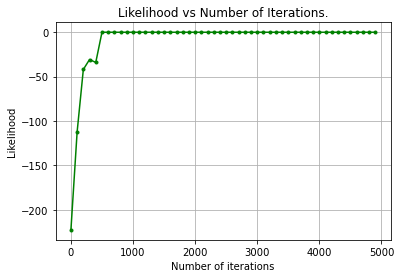

In [27]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

You should see the likelihood increasing as number of Iterations increase.

### The rest of your code goes here

In [20]:
#print TP,TN,FP,FN,TPR,FPR
def getAccuracy(w):
    
    hyp = hypothesis(X_test, w)

    TP, FP, TN, FN = 0, 0, 0, 0

    for i in range(len(hyp)):
        
    

        #class = 0
        if hyp[i] < .5:

            # True Negative
            if y_test[i] == 0:
                TN += 1

            #False Negative
            else:
                FN += 1
        #class = 1
        else:

            #True Positive
            if y_test[i] == 1:
                TP += 1

            #False Positive
            else:
                FP += 1

    print('TP: ',TP)
    print('TN: ',TN)
    print('FP: ',FP)
    print('FN: ',FN)

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    print('TPR: ', TPR)
    print('FPR: ',FPR)


# Step 3: Evaluating your model

In [21]:
learning_rate = 0.1
num_iters = 5000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-33.00262658 -33.04513271 -33.00081515 -33.02716321 -33.0624146
 -32.94811515 -32.98180306 -32.99906629 -33.0461958  -32.9893453
 -33.01224011 -32.98721892 -32.99987655 -33.00139113 -33.04504039
 -33.0619954  -33.07168847 -33.12712016 -33.06067076 -33.08321486
 -33.07060417 -33.13021712 -33.03388199 -33.03166634 -33.01294542
 -33.04067963 -33.03838207 -33.08143262 -33.03641683 -32.97094731
 -32.96100965]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [22]:
learning_rate = 0.9
num_iters = 5000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-33.38008246 -33.64926326 -33.40252523 -33.47974999 -33.56860287
 -33.29655324 -33.2320319  -33.29607643 -33.3336572  -33.29411644
 -33.1802258  -33.5346956  -33.4282281  -33.45321804 -33.5562355
 -33.55748841 -33.87096805 -34.03415858 -33.54869424 -33.55468468
 -33.72428783 -33.89233668 -33.6433993  -33.60946338 -33.3852188
 -33.65156665 -33.39989261 -33.34791208 -33.26884106 -33.13293821
 -33.07471698]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [23]:
learning_rate = 0.5
num_iters = 1000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-32.85789633 -32.91533054 -32.86544535 -32.85193869 -32.80754539
 -32.72082675 -32.83731749 -32.7465358  -32.79464695 -32.64820171
 -32.71321872 -32.78535165 -32.74154737 -32.870153   -32.88732202
 -32.89525419 -33.00421067 -33.18115195 -33.06959178 -33.09675882
 -33.01389993 -33.07525306 -32.90809435 -32.82586339 -32.9382543
 -32.8626415  -32.89998193 -32.82433863 -32.77031288 -32.61195503
 -32.64034535]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [24]:
learning_rate = 0.1
num_iters = 8000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-33.00270757 -33.04521369 -33.00089614 -33.0272442  -33.06249558
 -32.94819613 -32.98188404 -32.99914727 -33.04627678 -32.98942628
 -33.0123211  -32.98729991 -32.99995754 -33.00147212 -33.04512137
 -33.06207638 -33.07176946 -33.12720114 -33.06075175 -33.08329584
 -33.07068516 -33.1302981  -33.03396297 -33.03174732 -33.0130264
 -33.04076062 -33.03846305 -33.0815136  -33.03649781 -32.97102829
 -32.96109064]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [25]:
learning_rate = 0.01
num_iters = 8000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-12.84234123 -12.8755408  -12.83115503 -12.84995674 -12.90800258
 -12.81871385 -12.83783388 -12.83620275 -12.90249964 -12.86814515
 -12.87743117 -12.82450513 -12.85205777 -12.83548235 -12.87195428
 -12.89245776 -12.86258854 -12.9113044  -12.83608732 -12.85580488
 -12.84444953 -12.88772015 -12.82324676 -12.82564832 -12.83670467
 -12.89506299 -12.8657072  -12.90755313 -12.8954516  -12.84068406
 -12.83357523]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [26]:
learning_rate = 0.001
num_iters = 10000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

[-3.74799307 -3.78166708 -3.73962962 -3.75559775 -3.81574666 -3.72743366
 -3.74912063 -3.74643784 -3.8120566  -3.77976103 -3.7878741  -3.73239453
 -3.76063603 -3.74281966 -3.78070814 -3.80223929 -3.76984299 -3.81892203
 -3.74258952 -3.76215879 -3.74972798 -3.790131   -3.72831466 -3.73598866
 -3.74726835 -3.80545725 -3.7784496  -3.82059575 -3.80945906 -3.75646309
 -3.75021163]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [27]:
learning_rate = 0.05
num_iters = 5000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-22.9328337  -22.97911054 -22.92399573 -22.92934108 -22.98887313
 -22.88861176 -22.91946771 -22.9238274  -22.98715894 -22.94359652
 -22.9533604  -22.91481659 -22.93747238 -22.93318625 -22.95632302
 -22.97143179 -22.95093644 -23.01264219 -22.94466248 -22.95301317
 -22.95258118 -23.0052299  -22.92789456 -22.9263319  -22.9294217
 -22.97406697 -22.95105667 -22.99269842 -22.97716644 -22.92534794
 -22.91306525]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [28]:
learning_rate = 0.5
num_iters = 1000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-32.85789633 -32.91533054 -32.86544535 -32.85193869 -32.80754539
 -32.72082675 -32.83731749 -32.7465358  -32.79464695 -32.64820171
 -32.71321872 -32.78535165 -32.74154737 -32.870153   -32.88732202
 -32.89525419 -33.00421067 -33.18115195 -33.06959178 -33.09675882
 -33.01389993 -33.07525306 -32.90809435 -32.82586339 -32.9382543
 -32.8626415  -32.89998193 -32.82433863 -32.77031288 -32.61195503
 -32.64034535]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [29]:
learning_rate = 0.5
num_iters = 100 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

<ipython-input-10-216108069523>:11: RuntimeWarning: overflow encountered in exp
  val = (1 / (1 + np.exp(-z[i])))


[-11.6824619  -11.66540475 -11.65208891 -11.66580843 -11.65348392
 -11.60591092 -11.66967443 -11.53696679 -11.59469042 -11.4869139
 -11.54853624 -11.53397702 -11.54870687 -11.64288709 -11.68360057
 -11.72982931 -11.76710345 -11.91290422 -11.76094352 -11.79021363
 -11.69413515 -11.74956454 -11.6348097  -11.58536902 -11.73698023
 -11.70867835 -11.70180378 -11.61880398 -11.57529046 -11.46196483
 -11.5292228 ]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035


In [25]:
learning_rate = 0.0001
num_iters = 100 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

[ 0.06613822  0.03263035  0.07460287  0.05848022 -0.00183826  0.08630678
  0.06485879  0.06735181  0.00155736  0.03378525  0.02582668  0.08142346
  0.05313392  0.07102354  0.03308925  0.01147212  0.04420668 -0.00486974
  0.07151193  0.05191562  0.06455795  0.02420195  0.08581978  0.07806243
  0.06658931  0.00821543  0.03542395 -0.00686719  0.00418199  0.05705859
  0.06323018]
TP:  15
TN:  2
FP:  52
FN:  74
TPR:  0.16853932584269662
FPR:  0.9629629629629629


In [28]:
learning_rate = 0.001
num_iters = 10000 # The number of iterations to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_test, y_test, learning_rate, num_iters)
print(w)

getAccuracy(w)

[-3.74799307 -3.78166708 -3.73962962 -3.75559775 -3.81574666 -3.72743366
 -3.74912063 -3.74643784 -3.8120566  -3.77976103 -3.7878741  -3.73239453
 -3.76063603 -3.74281966 -3.78070814 -3.80223929 -3.76984299 -3.81892203
 -3.74258952 -3.76215879 -3.74972798 -3.790131   -3.72831466 -3.73598866
 -3.74726835 -3.80545725 -3.7784496  -3.82059575 -3.80945906 -3.75646309
 -3.75021163]
TP:  80
TN:  52
FP:  2
FN:  9
TPR:  0.898876404494382
FPR:  0.037037037037037035
